# Neural Network
## Thierry Khamphousone & Raphael Dray - TC-44


### 1)	Analyse des données
Charger la base de données (dataset.dat). Diviser la base de données aléatoirement (fonction train_test_split) en deux corpus (les classes sont équi-représentées dans les deux corpus) : 
-	base d’apprentissage (X_train, y_train) : 70% des données 
-	base de test (X_test, y_test): le reste (30% des données)

Afficher les données d’apprentissage et de test (fonction pyplot.show). 

Préciser la dimension des exemples, le nombre de classe, le nombre d’exemples d’apprentissage et de test.


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
data_array = np.loadtxt('./dataset.dat')

In [54]:
X = data_array[:, :2]
y = data_array[:, 2].astype(int)
df = pd.DataFrame({'feature1': X[:,0], 'feature2': X[:,1], 'label': y[:]})

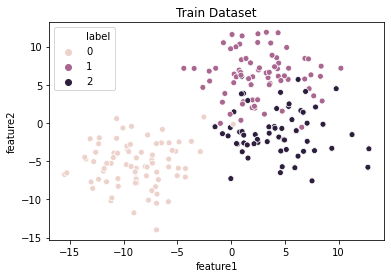

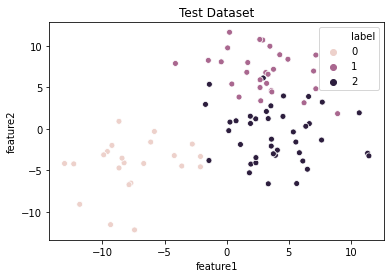

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2].values, df.iloc[:,2].values, train_size=0.7, test_size=0.3, random_state=42)

#Display X_train
df_xtrain = pd.DataFrame({'feature1': X_train[:,0], 'feature2': X_train[:,1], 'label': y_train[:]})
sns.scatterplot('feature1', 'feature2', data=df_xtrain, hue='label', s=35)
plt.title('Train Dataset')
plt.show()

#Display X_test
df_xtest = pd.DataFrame({'feature1': X_test[:,0], 'feature2': X_test[:,1], 'label': y_test[:]})
sns.scatterplot('feature1', 'feature2', data=df_xtest, hue='label', s=35)
plt.title('Test Dataset')
plt.show()

In [56]:
print(f'Dimension des exemples d\'apprentissage: {X_train.ndim}')
print(f'Nombre d\'exemple d\'apprentissage: {len(X_train)}')
print(f'Nombre de classe d\'apprentissage: {y_train.max() + 1}')
print()
print(f'Dimension des exemples de test: {X_test.ndim}')
print(f'Nombre d\'exemples de test: {len(X_test)}')
print(f'Nombre de classe de test: {y_test.max() + 1}')

Dimension des exemples d'apprentissage: 2
Nombre d'exemple d'apprentissage: 210
Nombre de classe d'apprentissage: 3

Dimension des exemples de test: 2
Nombre d'exemples de test: 90
Nombre de classe de test: 3


## 2)	Algorithme du plus-proche-voisin
a)	Définir un classifieur du (1-)plus-proche-voisin : 
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')

b)	Le régler sur la base d’apprentissage (fonction fit).

c)	Evaluer le taux de reconnaissance le taux de reconnaissance sur les bases d’apprentissage et de test (fonction score). Déterminer la matrice de confusion.

d)	Afficher les frontières de décision définies par les données d’apprentissage. Vérifier qu’elles correspondent à l’attendu.

e)	Afficher les frontières de décisions et les données de test. Retrouver les erreurs de classification.



In [57]:
from sklearn.neighbors import KNeighborsClassifier
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
one_NN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

Avec notre base d'entrainement (random_state = 42) qu'on a fit, 

on obtient par la suite un score de 0.8 en testant avec notre base de test. cela signifie que des points sont mal classés 

In [58]:
print('Accuracy on training set:', one_NN.score(X_train, y_train))
print('Accuracy on test set:', one_NN.score(X_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.8


In [59]:
from sklearn import metrics
Y_pred_test = one_NN.predict(X_test)
metrics.confusion_matrix(y_test, Y_pred_test)

array([[22,  0,  0],
       [ 0, 25,  3],
       [ 2, 13, 25]])

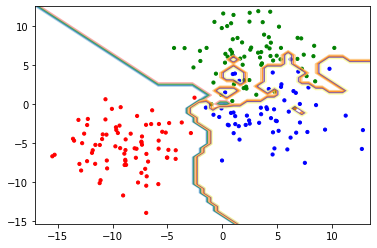

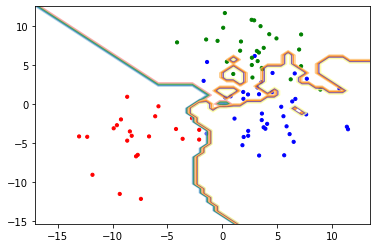

In [60]:
colors = np.array([x for x in 'rgbcmyk'])
X_min, X_max = X[:, 0].min() * 1.1, X[:, 0].max() * 1.1
Y_min, Y_max = X[:, 1].min() * 1.1, X[:, 1].max() * 1.1
X_h = (X_max - X_min)/50
Y_h = (Y_max - Y_min)/50
XX, YY = np.meshgrid(np.arange(X_min, X_max, X_h),
                     np.arange(Y_min, Y_max, Y_h))
Y = one_NN.predict(np.c_[XX.ravel(), YY.ravel()])
Y = Y.reshape(XX.shape)

plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], cmap=plt.cm.Paired, color=colors[y_train].tolist(), s=10)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.show()

plt.contour(XX, YY, Y, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], cmap=plt.cm.Paired, color=colors[y_test].tolist(), s=10)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())
plt.show()

In [61]:
max_size = X_train.shape[0]
acc = []
pandaSizeTraining = []

for size in range (1, 100):
    X_train1, temp1, y_train1, temp2 = train_test_split(X_train, y_train, train_size=size/100, random_state=42)
    pandaSizeTraining.append(np.shape(X_train1)[0])
    one_NN.fit(X_train1, y_train1)
    acc.append(one_NN.score(X_test, y_test))

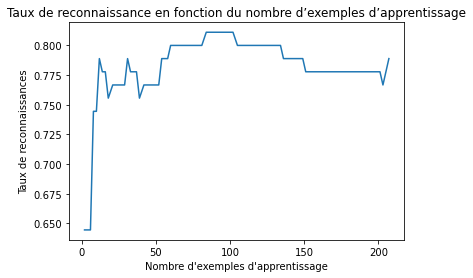

In [62]:
plt.title('Taux de reconnaissance en fonction du nombre d’exemples d’apprentissage')
plt.xlabel('Nombre d\'exemples d\'apprentissage')
plt.ylabel('Taux de reconnaissances')
plt.plot(pandaSizeTraining, acc)
plt.show()

On remarque que plus il y a de nombre d'exemples plus le taux de reconnaissance est meilleur.

De plus, plus le nombre d'exemples d'apprentissage est élevé plus le temps de classification sera élevé. En effet, si nous classions 10% de la base d'entrainement prendra plus de temps que de classer 100% de la base d'entrainement.

In [80]:
max_size = X_train.shape[0]
acc = []
pandaSizeTest = []

one_NN.fit(X_train, y_train)

for size in range (2, 100):
    X_test1, temp1, y_test1, temp2 = train_test_split(X_test, y_test, train_size=size/100, random_state=42)
    pandaSizeTest.append(np.shape(X_test1)[0])
    acc.append(one_NN.score(X_test1, y_test1))
    
#for size in range (1, 100):
    #X_test1 = []
    #y_test1 = []
    #int(np.round(size/100 * np.shape(X_test)[0]))
    #index = int(np.round(size/100 * np.shape(X_test)[0]))
    #print(index)
    #X_test1.append(X_test[:index, :])
    #y_test1.append(y_test[:index])
    #X_test1 = np.array(X_test1)
    #y_test1 = np.array(y_test1)
    #temp1, X_test1, temp2, y_test1 = train_test_split(X_test, y_test, train_size=1-(size/100), random_state=42)

    #print(np.shape(X_test1))
    #print(np.shape(y_test1))
    #pandaSizeTest.append(np.shape(X_test1)[0])
    #one_NN.fit(X_train, y_train)
    #acc.append(one_NN.score(X_test1, y_test1))

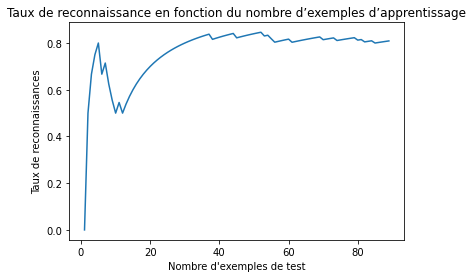

In [81]:
plt.title('Taux de reconnaissance en fonction du nombre d’exemples d’apprentissage')
plt.xlabel('Nombre d\'exemples de test')
plt.ylabel('Taux de reconnaissances')
plt.plot(pandaSizeTest, acc)
plt.show()

La taille de la base de donnée de test influe sur le taux de reconnaissance. 
Un premier cas où nous avons 1% de la base d'entrainement expliquant un taux de reconnaissance de ~100%, car il n'y à pas d'autres voisins pour déterminer que le panda dans la bdd ne mange pas de bambou en cachette parce que si il y a 2 pandas on aurait des bébés pandas.

On remarque que plus il y a de nombre d'exemples plus le taux de reconnaissance est meilleur.

De plus, plus le nombre d'exemples d'apprentissage est élevé plus le temps de classification sera élevé. En effet, si nous classions 10% de la base d'entrainement prendra plus de temps que de classer 100% de la base d'entrainement.